<a href="https://colab.research.google.com/github/biancabuleu/car-plate-detect/blob/main/dizertatie_carPlate_bun_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
!ln -s "/content/drive/MyDrive/CarPlate" "/content/CarPlate"

ln: failed to create symbolic link '/content/CarPlate/CarPlate': File exists


In [3]:
import pandas as pd
import xml.etree.ElementTree as xet


In [4]:
from glob import glob

In [5]:
path = glob('/content/drive/MyDrive/CarPlate/images/*.xml')
path

['/content/drive/MyDrive/CarPlate/images/N2.xml',
 '/content/drive/MyDrive/CarPlate/images/N3.xml',
 '/content/drive/MyDrive/CarPlate/images/N4.xml',
 '/content/drive/MyDrive/CarPlate/images/N5.xml',
 '/content/drive/MyDrive/CarPlate/images/N6.xml',
 '/content/drive/MyDrive/CarPlate/images/N7.xml',
 '/content/drive/MyDrive/CarPlate/images/N8.xml',
 '/content/drive/MyDrive/CarPlate/images/N9.xml',
 '/content/drive/MyDrive/CarPlate/images/N11.xml',
 '/content/drive/MyDrive/CarPlate/images/N12.xml',
 '/content/drive/MyDrive/CarPlate/images/N14.xml',
 '/content/drive/MyDrive/CarPlate/images/N15.xml',
 '/content/drive/MyDrive/CarPlate/images/N16.xml',
 '/content/drive/MyDrive/CarPlate/images/N17.xml',
 '/content/drive/MyDrive/CarPlate/images/N18.xml',
 '/content/drive/MyDrive/CarPlate/images/N19.xml',
 '/content/drive/MyDrive/CarPlate/images/N20.xml',
 '/content/drive/MyDrive/CarPlate/images/N21.xml',
 '/content/drive/MyDrive/CarPlate/images/N22.xml',
 '/content/drive/MyDrive/CarPlate/image

In [6]:
labels_dict = dict(filepath=[],xmin=[],xmax=[],ymin=[],ymax=[])
for filename in path:

    #filename = path[0]
    info = xet.parse(filename)
    root = info.getroot()
    member_object = root.find('object')
    labels_info = member_object.find('bndbox')
    xmin = int(labels_info.find('xmin').text)
    xmax = int(labels_info.find('xmax').text)
    ymin = int(labels_info.find('ymin').text)
    ymax = int(labels_info.find('ymax').text)
    #print(xmin,xmax,ymin,ymax)
    labels_dict['filepath'].append(filename)
    labels_dict['xmin'].append(xmin)
    labels_dict['xmax'].append(xmax)
    labels_dict['ymin'].append(ymin)
    labels_dict['ymax'].append(ymax)

In [7]:
df = pd.DataFrame(labels_dict)
df

,filepath,xmin,xmax,ymin,ymax
0,/content/drive/MyDrive/CarPlate/images/N2.xml,1804,2493,1734,1882
1,/content/drive/MyDrive/CarPlate/images/N3.xml,73,260,381,462
2,/content/drive/MyDrive/CarPlate/images/N4.xml,1326,1830,1464,1607
3,/content/drive/MyDrive/CarPlate/images/N5.xml,938,1173,709,762
4,/content/drive/MyDrive/CarPlate/images/N6.xml,858,1122,611,676
...,...,...,...,...,...
329,/content/drive/MyDrive/CarPlate/images/N368.xml,232,1803,912,1237
330,/content/drive/MyDrive/CarPlate/images/N369.xml,472,1581,744,912
331,/content/drive/MyDrive/CarPlate/images/N370.xml,494,1058,542,667
332,/content/drive/MyDrive/CarPlate/images/N371.xml,326,1737,635,900


In [8]:
df.to_csv('/content/CarPlate/labels.csv',index=False)

In [9]:
import os

# Define the folder path
folder_path = "/content/CarPlate/images"

# Get a list of all image files in the folder
image_files = [file for file in os.listdir(folder_path) if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith(".png")]

# Check if each image file has a corresponding XML file
missing_xml_files = []
for image_file in image_files:
    # Remove extension to get the base file name
    base_name, _ = os.path.splitext(image_file)
    xml_file = base_name + ".xml"
    # Check if XML file exists
    if xml_file not in os.listdir(folder_path):
        missing_xml_files.append(xml_file)

# Print the missing XML files
if missing_xml_files:
    print("The following XML files are missing:")
    for xml_file in missing_xml_files:
        print(xml_file)
else:
    print("All image files have corresponding XML files.")


All image files have corresponding XML files.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [11]:
df = pd.read_csv('/content/CarPlate/labels.csv')
df.head()

,filepath,xmin,xmax,ymin,ymax
0,/content/drive/MyDrive/CarPlate/images/N2.xml,1804,2493,1734,1882
1,/content/drive/MyDrive/CarPlate/images/N3.xml,73,260,381,462
2,/content/drive/MyDrive/CarPlate/images/N4.xml,1326,1830,1464,1607
3,/content/drive/MyDrive/CarPlate/images/N5.xml,938,1173,709,762
4,/content/drive/MyDrive/CarPlate/images/N6.xml,858,1122,611,676


In [12]:
import xml.etree.ElementTree as xet

In [13]:
filename = df['filepath'][0]
filename

'/content/drive/MyDrive/CarPlate/images/N2.xml'

In [14]:
def getFileName(filename):
    filename_image = xet.parse(filename).getroot().find('filename').text
    filepath_image = os.path.join('./images',filename_image)
    return filepath_image

In [15]:
getFileName(filename)

'./images/N2.jpeg'

In [16]:
image_path = list(df['filepath'].apply(getFileName))
image_path

['./images/N2.jpeg',
 './images/N3.jpeg',
 './images/N4.jpeg',
 './images/N5.jpeg',
 './images/N6.jpeg',
 './images/N7.jpeg',
 './images/N8.jpeg',
 './images/N9.jpeg',
 './images/N11.jpeg',
 './images/N12.jpeg',
 './images/N14.jpeg',
 './images/N15.jpeg',
 './images/N16.jpeg',
 './images/N17.jpeg',
 './images/N18.jpeg',
 './images/N19.jpeg',
 './images/N20.jpeg',
 './images/N21.jpeg',
 './images/N22.jpeg',
 './images/N23.jpeg',
 './images/N24.jpeg',
 './images/N25.jpeg',
 './images/N27.jpeg',
 './images/N28.jpeg',
 './images/N30.jpeg',
 './images/N31.jpeg',
 './images/N32.jpeg',
 './images/N33.jpeg',
 './images/N34.jpeg',
 './images/N35.jpeg',
 './images/N36.jpeg',
 './images/N37.jpeg',
 './images/N38.jpeg',
 './images/N40.jpeg',
 './images/N42.jpeg',
 './images/N43.jpeg',
 './images/N44.jpeg',
 './images/N45.jpeg',
 './images/N46.jpeg',
 './images/N47.jpeg',
 './images/N48.jpeg',
 './images/N49.jpeg',
 './images/N50.jpeg',
 './images/N51.jpeg',
 './images/N52.jpeg',
 './images/N53.jpe

In [17]:
file_path = image_path[0]
file_path

'./images/N2.jpeg'

In [18]:
img = cv2.imread("/content/CarPlate/"+file_path)
#<xmin>1804</xmin>
#<ymin>1734</ymin>
#<xmax>2493</xmax>
#<ymax>1882</ymax>


In [19]:
cv2.rectangle(img,(1804,2493),(1734,1882),(0,255,0),3)

array([[[ 61,  83,  95],
        [ 60,  82,  94],
        [ 62,  84,  96],
        ...,
        [184, 115,  35],
        [183, 114,  34],
        [183, 114,  34]],

       [[ 64,  86,  98],
        [ 61,  83,  95],
        [ 61,  83,  95],
        ...,
        [185, 116,  36],
        [183, 114,  34],
        [183, 114,  34]],

       [[ 66,  87, 102],
        [ 64,  85, 100],
        [ 62,  83,  98],
        ...,
        [183, 117,  36],
        [181, 112,  32],
        [180, 111,  31]],

       ...,

       [[ 75,  90,  93],
        [ 70,  85,  88],
        [ 67,  79,  83],
        ...,
        [ 80,  97, 110],
        [ 74,  90, 103],
        [ 70,  86,  99]],

       [[ 83,  97, 103],
        [ 66,  80,  86],
        [ 49,  61,  65],
        ...,
        [ 95, 112, 125],
        [ 90, 106, 119],
        [ 86,  99, 113]],

       [[ 96, 110, 116],
        [ 72,  86,  92],
        [ 49,  60,  64],
        ...,
        [105, 122, 135],
        [103, 116, 130],
        [ 96, 109, 123]]

In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [21]:
labels = df.iloc[:,1:].values

In [22]:
data =[]
output = []

for ind in range(len(image_path)):
    image = image_path[ind]

    img_arr = cv2.imread("/content/CarPlate/" +image)
    print(img_arr)
    h,w,d = img_arr.shape

    ##preprocesare
    load_image = load_img("/content/CarPlate/" +image, target_size=(224,224))
    load_image_arr = img_to_array(load_image)
    norm_load_image_arr = load_image_arr/225.0 #normalizare

    xmin,xmax,ymin,ymax = labels[ind]
    nxmin,nxmax = xmin/w, xmax/w
    nymin, nymax = ymin/h, ymax/h
    label_norm = (nxmin,nxmax,nymin,nymax) #normalizare output
    data.append(norm_load_image_arr)
    output.append(label_norm)

Datele de ieșire de afișat au fost trunchiate la ultimele 5000 linii.
  [ 89  90  94]
  [ 89  90  94]]]
[[[15 13 12]
  [16 14 13]
  [19 17 16]
  ...
  [ 3  3  3]
  [ 4  4  4]
  [ 5  5  5]]

 [[18 16 15]
  [18 16 15]
  [19 17 16]
  ...
  [ 3  3  3]
  [ 3  3  3]
  [ 4  4  4]]

 [[22 20 19]
  [21 19 18]
  [18 16 15]
  ...
  [ 3  3  3]
  [ 3  3  3]
  [ 3  3  3]]

 ...

 [[21 28 31]
  [19 26 29]
  [16 23 26]
  ...
  [23 25 26]
  [26 26 26]
  [27 27 27]]

 [[20 25 26]
  [22 27 28]
  [23 28 29]
  ...
  [22 24 25]
  [20 20 20]
  [25 25 25]]

 [[19 24 25]
  [22 27 28]
  [23 28 29]
  ...
  [22 24 25]
  [17 17 17]
  [22 22 22]]]
[[[115 116 106]
  [115 116 106]
  [115 116 106]
  ...
  [168 108  86]
  [171 108  88]
  [174 108  89]]

 [[115 116 106]
  [115 116 106]
  [115 116 107]
  ...
  [160 102  80]
  [163 102  82]
  [164 103  83]]

 [[115 116 106]
  [115 116 107]
  [116 117 108]
  ...
  [155  98  76]
  [156  99  77]
  [154 100  77]]

 ...

 [[ 33  35  35]
  [ 34  36  36]
  [ 37  39  39]
  ...
  

In [23]:
X = np.array(data,dtype=np.float32)
y= np.array(output,dtype=np.float32)

In [24]:
X.shape,y.shape

((334, 224, 224, 3), (334, 4))

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((267, 224, 224, 3), (67, 224, 224, 3), (267, 4), (67, 4))

In [26]:
from tensorflow.keras.applications import MobileNetV2, InceptionV3, InceptionResNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.models import Model
import tensorflow as tf

In [27]:
inception_resnet = InceptionResNetV2(weights="imagenet",include_top=False,input_tensor=Input(shape=(224,224,3)))
inception_resnet.trainable = False

headmodel = inception_resnet.output
headmodel = Flatten()(headmodel)
headmodel=Dense(500,activation="relu")(headmodel)
headmodel=Dense(250,activation="relu")(headmodel)
headmodel=Dense(4,activation="sigmoid")(headmodel)

#model

model = Model(inputs=inception_resnet.input,outputs = headmodel)

In [28]:
#compilare model
model.compile(loss="mse",optimizer =tf.keras.optimizers.Adam(learning_rate =1e-4))
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [29]:
from tensorflow.keras.callbacks import TensorBoard
tfb = TensorBoard('object_detection')

In [30]:
history = model.fit(x=x_train,y=y_train,batch_size=16,epochs=400,
                    validation_data=(x_test,y_test),callbacks=[tfb])

Epoch 1/400
17/17 [==============================] - 32s 761ms/step - loss: 0.1464 - val_loss: 0.1590
Epoch 2/400
17/17 [==============================] - 2s 135ms/step - loss: 0.1495 - val_loss: 0.1612
Epoch 3/400
17/17 [==============================] - 2s 135ms/step - loss: 0.1481 - val_loss: 0.1547
Epoch 4/400
17/17 [==============================] - 2s 126ms/step - loss: 0.1417 - val_loss: 0.1495
Epoch 5/400
17/17 [==============================] - 2s 143ms/step - loss: 0.1394 - val_loss: 0.1415
Epoch 6/400
17/17 [==============================] - 2s 122ms/step - loss: 0.1375 - val_loss: 0.1524
Epoch 7/400
17/17 [==============================] - 2s 136ms/step - loss: 0.1420 - val_loss: 0.1559
Epoch 8/400
17/17 [==============================] - 2s 136ms/step - loss: 0.1381 - val_loss: 0.1477
Epoch 9/400
17/17 [==============================] - 2s 121ms/step - loss: 0.1410 - val_loss: 0.1426
Epoch 10/400
17/17 [==============================] - 2s 139ms/step - loss: 0.1322 - val_l

In [31]:
model.save('/content/CarPlate/models/object_detection.keras')

<Axes: >

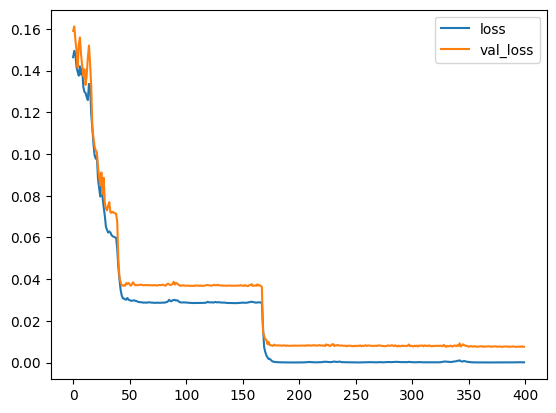

In [32]:
pd.DataFrame(history.history).plot(kind='line')

In [84]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [85]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [86]:
ls

CarPlate@  drive/  sample_data/


In [87]:
# load model
model = tf.keras.models.load_model('/content/CarPlate/models/object_detection.keras')
print('model loaded sucessfully')

model loaded sucessfully


In [89]:
path = '/content/CarPlate/test_images/N202.jpeg'
image = load_img(path) # PIL object
image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output

In [90]:
# size of the orginal image
h,w,d = image.shape
print('Height of the image =',h)
print('Width of the image =',w)

Height of the image = 354
Width of the image = 500


In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [91]:
image_arr_224.shape

(224, 224, 3)

In [92]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [94]:
# make predictions
coords = model.predict(test_arr)
coords

1/1 [==============================] - 6s 6s/step


array([[0.30002937, 0.64850694, 0.727846  , 0.8386985 ]], dtype=float32)

In [95]:
# denormalize the values
denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[150.0146836 , 324.25346971, 257.65749335, 296.89927125]])

In [96]:
coords = coords.astype(np.int32)
coords

array([[150, 324, 257, 296]], dtype=int32)

(150, 257) (324, 296)


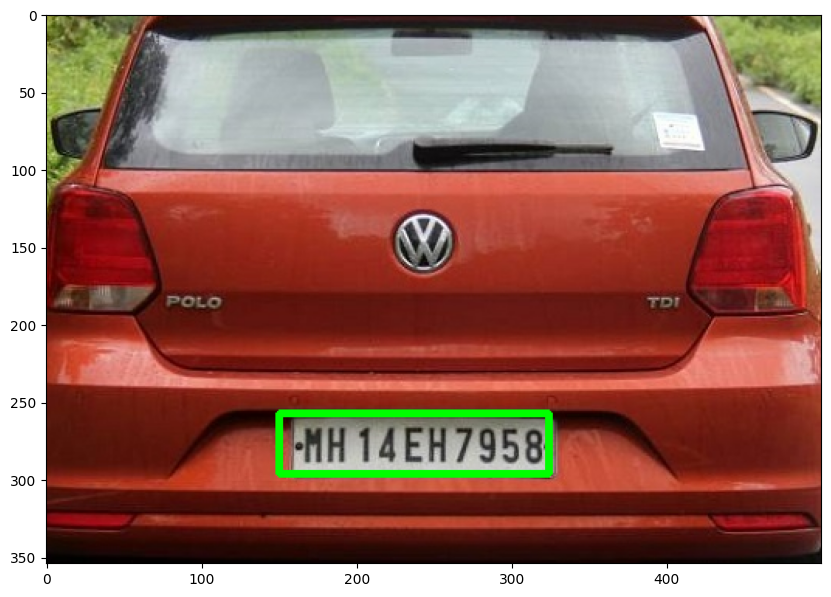

In [97]:
# draw bounding on top the image
xmin, xmax,ymin,ymax = coords[0]
pt1 =(xmin,ymin)
pt2 =(xmax,ymax)
print(pt1, pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [98]:
path = '/content/CarPlate/test_images/N202.jpeg'
def object_detection(path):
    # read image
    image = load_img(path) # PIL object
    image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path,target_size=(224,224))
    # data preprocessing
    image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    # make predictions
    coords = model.predict(test_arr)
    # denormalize the values
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    # draw bounding on top the image
    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

1/1 [==============================] - 1s 586ms/step
(629, 745) (2554, 1296)


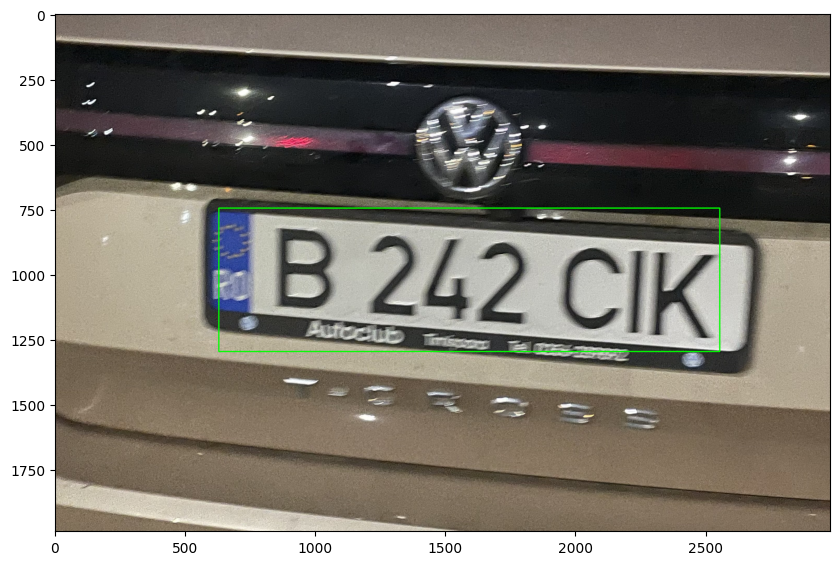

In [361]:
path = '/content/CarPlate/test_images/N359.jpeg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [100]:
!apt install tesseract-ocr
!apt install libtesseract-dev
!pip install Pillow
!pip install pytesseract
import pytesseract
from PIL import ImageEnhance, ImageFilter, Image

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libtesseract-dev is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


1/1 [==============================] - 0s 329ms/step
(3, 90) (296, 156)


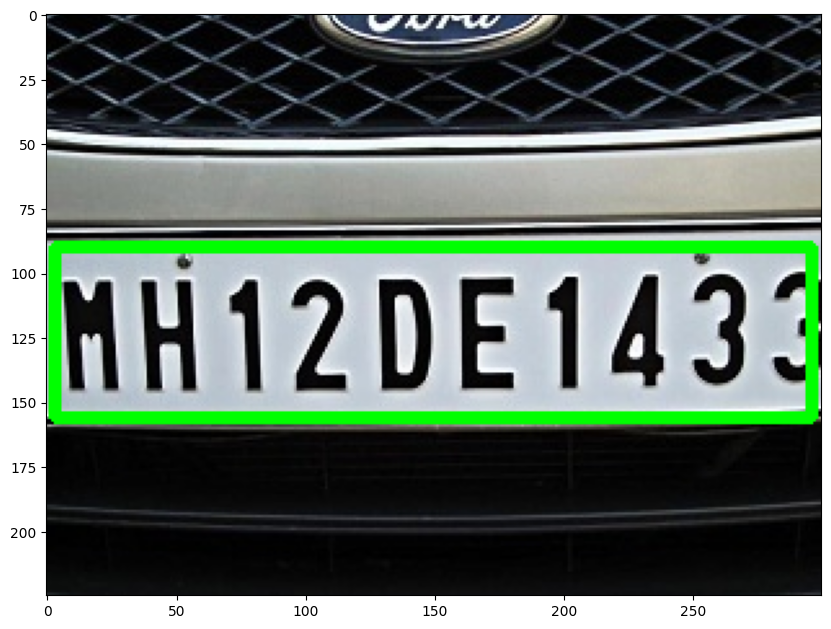

In [394]:
path = '/content/CarPlate/test_images/N219.jpeg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [395]:
img = np.array(load_img(path))
xmin ,xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]


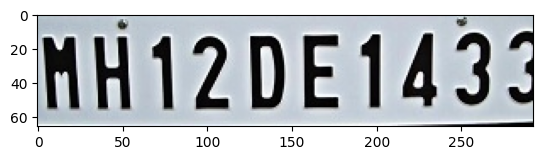

In [396]:
plt.imshow(roi)
plt.show()

In [397]:
import cv2
import pytesseract
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
import re

img = np.array(load_img(path))
xmin ,xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]

gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

# Increase image contrast
alpha = 1.5  # Simple contrast control
beta = 0     # Simple brightness control
contrast_roi = cv2.convertScaleAbs(gray_roi, alpha=alpha, beta=beta)

# Apply Gaussian blur to reduce noise
blurred_roi = cv2.GaussianBlur(contrast_roi, (5, 5), 0)

# Apply binary thresholding
_, binary_roi = cv2.threshold(blurred_roi, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Apply dilation to make the text thicker
kernel = np.ones((3, 3), np.uint8)
dilated_roi = cv2.dilate(binary_roi, kernel, iterations=1)

# Perform OCR with custom configuration
custom_config = r'--oem 3 --psm 8 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
text = pytesseract.image_to_string(dilated_roi, config=custom_config).strip()

# Define valid prefixes for Romanian car plates
valid_prefixes = [
    "AB", "AG", "AR", "B", "BC", "BH", "BN", "BR", "BT", "BV", "BZ", "CJ", "CL", "CS", "CT", "CV",
    "DB", "DJ", "GJ", "GL", "GR", "HD", "HR", "IF", "IL", "IS", "MH", "MM", "MS", "NT", "OT", "PH",
    "SB", "SJ", "SM", "SV", "TL", "TM", "TR", "VL", "VN", "VS"
]

# Common OCR misinterpretations mapping for numbers
correction_mapping_numbers = {
    'O': '0', 'I': '1', 'Z': '2', 'S': '5', 'B': '8', 'G': '6', 'A': '4'
}

def correct_ocr_errors_in_numbers(text):
    corrected_text = ""
    for char in text:
        if char in correction_mapping_numbers:
            corrected_text += correction_mapping_numbers[char]
        else:
            corrected_text += char
    return corrected_text

# Function to validate and correct OCR results
def validate_car_plate(text):
    if len(text) < 5:  # Minimum length of a valid plate like B 12 XYZ
        return "Invalid car plate"
    prefix = ""
    rest = ""
    # If the text starts with three letters and the first two are not a valid prefix, correct it
    if text[:3].isalpha() and text[:2] not in valid_prefixes:
        if text[1:3] in valid_prefixes:
            text = text[1:]
            prefix = text[:2]
            rest = text[2:]
        else:
            text = text[:4] + text[4:]
            prefix = text[:2]
            rest = text[2:]



    # Validate prefix
    if prefix in valid_prefixes:
        # Correct common OCR errors only in the number part
        corrected_rest = correct_ocr_errors_in_numbers(rest)

        # Extract numeric and letter parts from the corrected rest
        number_part = ''.join([c for c in corrected_rest if c.isdigit()])
        letter_part = ''.join([c for c in corrected_rest if c.isalpha()])

        # Validate the corrected number part and letter part
        if len(number_part) in [2, 3] and len(letter_part) == 3:
            return f"{prefix} {number_part} {letter_part}"
        else:
            return "Invalid car plate"
    else:
        return "Invalid car plate"

# Validate the corrected text
def is_valid_car_plate(text):
    if len(text) == 8 :

        if text[0] == 'B' and text[1].isdigit():
          prefix = text[:1]
          rest = text[1:]
          if(rest.isdigit()):
            return True
          else:
            return False
        if text[:2] in valid_prefixes:
          if(text[2:].isdigit()):
            return True
          else:
            return False

    if len(text) < 6 or len(text) > 7:
        return False

    # Check if the first character is 'B' or if the first two characters form a valid prefix
    if text[0] == 'B' and text[1].isdigit():
        prefix = text[:1]
        rest = text[1:]
    else:
        prefix = text[:2]
        rest = text[2:]

    if prefix in valid_prefixes:
        print(f"Judet: {prefix}")
        number_part = ''.join([c for c in rest if c.isdigit()])
        letter_part = ''.join([c for c in rest if c.isalpha()])

        if len(number_part) in [2, 3] and len(letter_part) == 3:
            return True
    return False

# Example usage:
if len(text) > 9:
    print(f"'{text}' is a valid car plate")
else:

  if is_valid_car_plate(text):
    print(f"'{text}' is a valid car plate")
  else:
    delete_first = text[1:]
    if is_valid_car_plate(delete_first):
      print(f"'{delete_first}' is a valid car plate")
    else:
        validated_text = validate_car_plate(text)
        if(validated_text != "Invalid car plate"):
         print(f'Validated text: {validated_text}')
        if(validated_text == "Invalid car plate"):
          text = pytesseract.image_to_string(roi, lang='eng', config='--psm 6')
          remove = re.sub(r'[^A-Za-z0-9]', '', text)
          print(remove)







MH12DE143


In [294]:
import cv2
text = pytesseract.image_to_string(roi, lang='eng', config='--psm 6')
print(text)

import numpy as np
from PIL import Image
import cv2
gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
thr = cv2.adaptiveThreshold(gray_roi, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 91, 93)

# Invert the thresholded image
bnt = cv2.bitwise_not(thr)

# Perform OCR on the processed image
txt = pytesseract.image_to_string(bnt, config="--psm 6")

# Print the extracted text
print(txt+"00")

MH 14EH7958

00


In [289]:
import cv2
import pytesseract
import numpy as np
from tensorflow.keras.preprocessing.image import load_img

img = np.array(load_img(path))
xmin ,xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]

# Convert ROI to grayscale
gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

# Increase image contrast
alpha = 1.5  # Simple contrast control
beta = 0     # Simple brightness control
contrast_roi = cv2.convertScaleAbs(gray_roi, alpha=alpha, beta=beta)

# Apply Gaussian blur to reduce noise
blurred_roi = cv2.GaussianBlur(contrast_roi, (5, 5), 0)

# Apply binary thresholding
_, binary_roi = cv2.threshold(blurred_roi, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Apply dilation to make the text thicker
kernel = np.ones((3, 3), np.uint8)
dilated_roi = cv2.dilate(binary_roi, kernel, iterations=1)


# Perform OCR with custom configuration
custom_config = r'--oem 3 --psm 8 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
text = pytesseract.image_to_string(dilated_roi, config=custom_config)

print(f'Recognized text: {text}')


Recognized text: P7



In [121]:
import cv2
import pytesseract
import numpy as np
from tensorflow.keras.preprocessing.image import load_img

img = np.array(load_img(path))
xmin ,xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]

# Convert ROI to grayscale
gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

# Increase image contrast
alpha = 1.5  # Simple contrast control
beta = 0     # Simple brightness control
contrast_roi = cv2.convertScaleAbs(gray_roi, alpha=alpha, beta=beta)

# Apply Gaussian blur to reduce noise
blurred_roi = cv2.GaussianBlur(contrast_roi, (5, 5), 0)

# Apply binary thresholding
_, binary_roi = cv2.threshold(blurred_roi, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Apply dilation to make the text thicker
kernel = np.ones((3, 3), np.uint8)
dilated_roi = cv2.dilate(binary_roi, kernel, iterations=1)



# Perform OCR with custom configuration
custom_config = r'--oem 3 --psm 8 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
text = pytesseract.image_to_string(dilated_roi, config=custom_config).strip()

# Define valid prefixes for Romanian car plates
valid_prefixes = [
    "AB", "AG", "AR", "B", "BC", "BH", "BN", "BR", "BT", "BV", "BZ", "CJ", "CL", "CS", "CT", "CV",
    "DB", "DJ", "GJ", "GL", "GR", "HD", "HR", "IF", "IL", "IS", "MH", "MM", "MS", "NT", "OT", "PH",
    "SB", "SJ", "SM", "SV", "TL", "TM", "TR", "VL", "VN", "VS"
]

# Function to validate and correct OCR results
def validate_car_plate(text):
    # If the recognized text starts with three letters, check and correct it
    if len(text) > 0 and text[0:3].isalpha() and text[0:2] not in valid_prefixes:
        # Remove the third letter if the first two letters are valid
        if text[1:3] in valid_prefixes:
            text = text[1:]
        else:
            text = text[:2] + text[3:]

    # Validate the remaining format: two or three numbers followed by three letters
    if len(text) > 0:
        parts = text.split()
        if len(parts) == 2:
            letters1, rest = parts[0], parts[1]
            if letters1 in valid_prefixes and rest[:2].isdigit() and rest[2:].isalpha():
                return text
            if letters1 in valid_prefixes and rest[:3].isdigit() and rest[3:].isalpha():
                return text

    return "Invalid car plate"

# Validate the recognized text
validated_text = validate_car_plate(text)
print(f'Recognized text: {text}')
print(f'Validated text: {validated_text}')


Recognized text: FCJO5KMC
Validated text: Invalid car plate


In [281]:
import cv2
import pytesseract

# Update these paths
image_path = '/content/CarPlate/test_images/N202.jpeg'

# Load the image
image = cv2.imread(image_path)

# Preprocess the image: convert to grayscale and apply binary threshold
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY_INV)

# Set the Tesseract executable path


# Perform OCR
text = pytesseract.image_to_string(binary_image, config='--psm 8')
print(f'Recognized text: {text}')


Recognized text: —



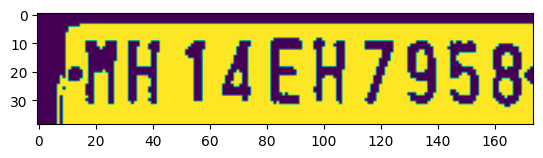

HH 14EH7958



In [282]:
enhanced_image = cv2.convertScaleAbs(roi, alpha=1.5, beta=0)

# Convert the enhanced image to grayscale
gray_image = cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2GRAY)

# Apply noise reduction using Non-local Means Denoising
denoised_image = cv2.fastNlMeansDenoising(gray_image, None, h=10, searchWindowSize=21)

# Apply image binarization (e.g., using Otsu's thresholding method)
_, binary_image = cv2.threshold(denoised_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(binary_image)
plt.show()
# Perform text extraction using Tesseract
text = pytesseract.image_to_string(binary_image, lang='eng', config='--psm 6')

# Print the extracted text
print(text)


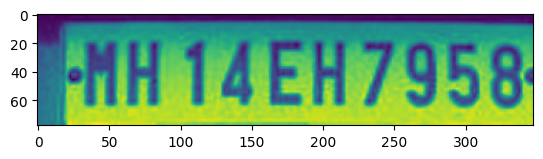

PHH14EH7958



In [283]:
import cv2
import pytesseract

# Resize the ROI image
resize_test_license_plate = cv2.resize(
    roi, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

# Convert to grayscale
grayscale_resize_test_license_plate = cv2.cvtColor(
    resize_test_license_plate, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
gaussian_blur_license_plate = cv2.GaussianBlur(
    grayscale_resize_test_license_plate, (5, 5), 0)

# Perform OCR with configuration options
new_predicted_result_GWT2180 = pytesseract.image_to_string(
    gaussian_blur_license_plate,
    lang='eng',
    config='--oem 3 -l eng --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
plt.imshow(grayscale_resize_test_license_plate)
plt.show()
# Filter and print the result
filter_new_predicted_result_GWT2180 = "".join(new_predicted_result_GWT2180.split()).replace(":", "").replace("-", "")
print(new_predicted_result_GWT2180)


In [ ]:
# Read the license plate file and display it


resize_test_license_plate = cv2.resize(roi, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC)
grayscale_resize_test_license_plate = cv2.cvtColor(resize_test_license_plate, cv2.COLOR_BGR2GRAY)

gaussian_blur_license_plate = cv2.GaussianBlur(
    grayscale_resize_test_license_plate, (5, 5), 0)
plt.imshow(gaussian_blur_license_plate)
plt.axis('off')
plt.title('TM25GRO license plate')
custom_config = r'--oem 3 -l eng -c tessedit_char_whitelist=ABCDEFGHJKLMNPQRSTUVWXYZ1234567890 --psm 6'
new_predicted_result_GWT2180 = pytesseract.image_to_string(gaussian_blur_license_plate, lang ='eng', config =custom_config)

filter_new_predicted_result_GWT2180 = "".join(new_predicted_result_GWT2180.split()).replace(":", "").replace("-", "")
print(filter_new_predicted_result_GWT2180)

In [ ]:
import cv2
import numpy as np
import tensorflow as tf

# Assuming `load_img` returns a TensorFlow tensor
cropped_image = tf.image.crop_to_bounding_box(load_img( '/content/CarPlate/test_images/N314.jpeg'), int(ymin), int(xmin), int(ymax - ymin), int(xmax - xmin))

# Convert TensorFlow tensor to NumPy array
cropped_image_np = cropped_image.numpy()

# Convert the color to grayscale
gray = cv2.cvtColor(cropped_image_np, cv2.COLOR_BGR2GRAY)

# Apply thresholding
gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

# Apply median blur
gray = cv2.medianBlur(gray, 3)

plt.imshow(gray)
plt.show()

custom_config = r'-c tessedit_char_whitelist=ABCDEFGHJKLMNPQRSTUVWXYZ1234567890 --psm 6'
plate_num = pytesseract.image_to_string(gray,config=custom_config)
print(plate_num)


In [ ]:
import cv2
import pytesseract
from imutils import contours


image = cv2.imread(roi)
height, width, _ = image.shape
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts, _ = contours.sort_contours(cnts, method="left-to-right")

plate = ""
for c in cnts:
    area = cv2.contourArea(c)
    x,y,w,h = cv2.boundingRect(c)
    center_y = y + h/2
    if area > 3000 and (w > h) and center_y > height/2:
        ROI = image[y:y+h, x:x+w]
        data = pytesseract.image_to_string(ROI, lang='eng', config='--psm 6')
        plate += data

print('License plate:', plate)

In [ ]:
import cv2
import pytesseract
import numpy as np

# Update these paths
image_path = 'path_to_your_image.jpg'
tesseract_cmd_path = r'path_to_tesseract_executable'

# Load and preprocess the image
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
edges = cv2.Canny(blurred_image, 50, 150)

# Find contours and detect the car plate
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
plate_image = None
for contour in contours:
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    if len(approx) == 4:
        x, y, w, h = cv2.boundingRect(approx)
        plate_image = gray_image[y:y+h, x:x+w]
        break

# If a plate was detected, process it
if plate_image is not None:
    _, binary_plate = cv2.threshold(plate_image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    # Set the Tesseract executable path
    pytesseract.pytesseract.tesseract_cmd = tesseract_cmd_path

    # Perform OCR
    custom_config = r'--oem 3 --psm 8 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
    text = pytesseract.image_to_string(binary_plate, config=custom_config)
    print(f'Recognized text: {text}')
else:
    print('No car plate detected')
